In [27]:
import pandas as pd
import numpy as np

#bc_df = pd.read_csv('../data/raw/hs_futures/HS_1m_all.csv')
bc_df = pd.read_csv('~/hsg26_intraday-1min_historical-data-02-26-2026.csv').iloc[:-1]

In [28]:
bc_df['Time'] = pd.to_datetime(bc_df['Time'])
bc_df['Date'] = bc_df['Time'].dt.strftime('%Y-%m-%d')
bc_df.groupby('Date').last().iloc[-10:]
bc_df = bc_df.set_index('Time')

In [29]:
from linux_xbbg import blp

df = blp.bdib('HIG6 Index', dt='2026-02-12', typ='TRADE', session='day', ref='HSI Index').droplevel(0, axis=1)

In [30]:
df.index = df.index.tz_convert('America/Chicago').tz_localize(None)

In [34]:
merged = df[['close']].merge(bc_df[['Latest']], left_index=True, right_index=True, how='inner')

<Axes: >

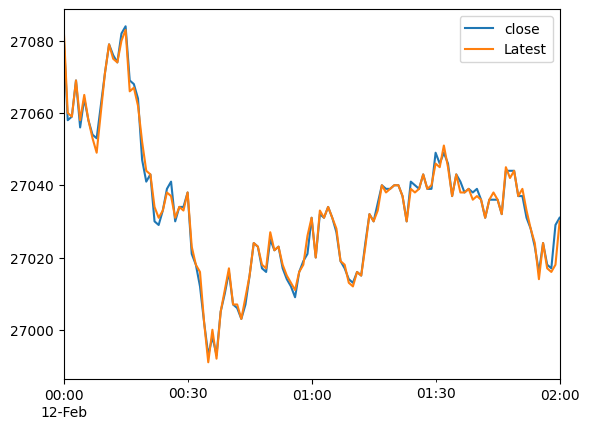

In [37]:
merged[['close','Latest']].plot()

In [36]:
bc_df.between_time('18:00', '20:00').index[0].tz_localize('America/Chicago').tz_convert('Asia/Hong_Kong')

Timestamp('2026-02-13 09:14:00+0800', tz='Asia/Hong_Kong')

In [ ]:
pd.Timestamp('2026-02-12 03:00:00').tz_localize('Asia/Hong_Kong').tz_convert('America/New_York')

Timestamp('2026-02-11 14:00:00-0500', tz='America/New_York')

In [ ]:
import numpy as np